### This project includes:
1. Data Analysis & Distribution (EDA)
2. Time Series Analysis
3. NLP Processing & Text Analysis
  
### This notebook is the second part: Time Series Analysis

In [6]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

# Read Data

In [7]:
clients = pd.read_csv("/Users/sqtang37/Desktop/Project/DataFest 2023/data/clients.csv")
questions = pd.read_csv("/Users/sqtang37/Desktop/Project/DataFest 2023/data/questions.csv")
attorneys = pd.read_csv("/Users/sqtang37/Desktop/Project/DataFest 2023/data/attorneys.csv")
questions = pd.read_csv("/Users/sqtang37/Desktop/Project/DataFest 2023/data/questions.csv")

In [8]:
qp = []

with open('/Users/sqtang37/Desktop/Project/DataFest 2023/data/questionposts copy.txt', 'r') as file:
    for line in file:
        qp.append(line)
        
Qposts = pd.DataFrame([line.split(',', 3) for line in qp], columns=['Id', 'StateAbbr', 'QuestionUno', 'PostText'])

Qposts[['PostText', 'CreatedUtc']] = Qposts['PostText'].str.rsplit(',', 1, expand=True)

In [9]:
Qposts['PostText'] = Qposts['PostText'].str.replace(r'^"|"$', '', regex=True)
Qposts['CreatedUtc'] = Qposts['CreatedUtc'].str.replace(r'"', '', regex=True).str.replace(r'\n', '', regex=True)

Qposts = Qposts.iloc[1:]

In [10]:
attorneys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11544 entries, 0 to 11543
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           11544 non-null  int64 
 1   StateAbbr    11544 non-null  object
 2   AttorneyUno  11544 non-null  object
 3   City         11529 non-null  object
 4   County       11539 non-null  object
 5   StateName    11544 non-null  object
 6   PostalCode   11544 non-null  int64 
 7   CreatedUtc   11544 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.6+ KB


In [11]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331426 entries, 0 to 331425
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  331426 non-null  int64  
 1   StateAbbr           331426 non-null  object 
 2   ClientUno           331426 non-null  object 
 3   County              331180 non-null  object 
 4   StateName           331426 non-null  object 
 5   PostalCode          314157 non-null  float64
 6   EthnicIdentity      278298 non-null  object 
 7   Age                 279870 non-null  float64
 8   Gender              280227 non-null  object 
 9   MaritalStatus       279548 non-null  object 
 10  Veteran             269757 non-null  object 
 11  Imprisoned          280602 non-null  object 
 12  NumberInHousehold   280602 non-null  float64
 13  AnnualIncome        280565 non-null  float64
 14  AllowedIncome       280602 non-null  float64
 15  CheckingBalance     212020 non-nul

In [12]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202879 entries, 0 to 202878
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   202879 non-null  int64 
 1   StateAbbr            202879 non-null  object
 2   QuestionUno          202879 non-null  object
 3   CategoryUno          202879 non-null  object
 4   Category             202879 non-null  object
 5   SubcategoryUno       202879 non-null  object
 6   Subcategory          202879 non-null  object
 7   AskedByClientUno     202841 non-null  object
 8   AskedOnUtc           202879 non-null  object
 9   TakenByAttorneyUno   144005 non-null  object
 10  TakenOnUtc           145651 non-null  object
 11  ClosedByAttorneyUno  137787 non-null  object
 12  ClosedOnUtc          199085 non-null  object
 13  LegalDeadline        43944 non-null   object
dtypes: int64(1), object(13)
memory usage: 21.7+ MB


In [13]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202879 entries, 0 to 202878
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   202879 non-null  int64 
 1   StateAbbr            202879 non-null  object
 2   QuestionUno          202879 non-null  object
 3   CategoryUno          202879 non-null  object
 4   Category             202879 non-null  object
 5   SubcategoryUno       202879 non-null  object
 6   Subcategory          202879 non-null  object
 7   AskedByClientUno     202841 non-null  object
 8   AskedOnUtc           202879 non-null  object
 9   TakenByAttorneyUno   144005 non-null  object
 10  TakenOnUtc           145651 non-null  object
 11  ClosedByAttorneyUno  137787 non-null  object
 12  ClosedOnUtc          199085 non-null  object
 13  LegalDeadline        43944 non-null   object
dtypes: int64(1), object(13)
memory usage: 21.7+ MB


In [14]:
Qposts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406188 entries, 1 to 406188
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Id           406188 non-null  object
 1   StateAbbr    405593 non-null  object
 2   QuestionUno  405589 non-null  object
 3   PostText     405580 non-null  object
 4   CreatedUtc   405570 non-null  object
dtypes: object(5)
memory usage: 15.5+ MB


---

# Time Series Analysis
1. General trend of numbers of question posts each year & each month of year
3. Rolling averages  
   - Smooth out short-term fluctuations and identify long-term trends

### General trend of numbers of question posts each year

In [24]:
questions['AskedOnUtc'] = pd.to_datetime(questions['AskedOnUtc'])
questions['AskedOnUtcYear'] = questions['AskedOnUtc'].dt.year
questions_asked_year = questions.groupby("AskedOnUtcYear").size()

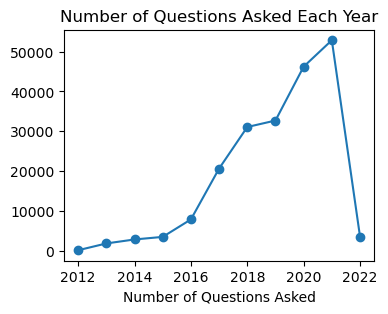

In [26]:
plt.figure(figsize = (4,3))
plt.plot(questions_asked_year, marker='o', linestyle='-')
plt.xlabel("Year")
plt.xlabel("Number of Questions Asked")
plt.title("Number of Questions Asked Each Year")
plt.show()

In [27]:
latest_date = questions['AskedOnUtc'].max()
print("The latest date is:", latest_date)
# This is the reason why there's a drastic drop in 2022

The latest date is: 2022-01-25 07:43:43


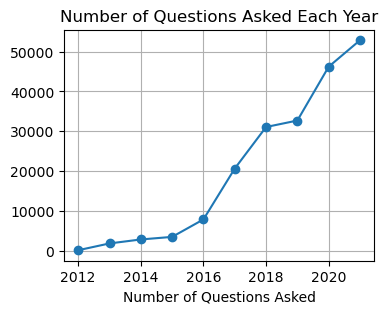

In [28]:
# Without considering 2022
questions_asked_year = questions_asked_year[:-1]

plt.figure(figsize = (4,3))
plt.plot(questions_asked_year, marker='o', linestyle='-')
plt.xlabel("Year")
plt.xlabel("Number of Questions Asked")
plt.title("Number of Questions Asked Each Year")
plt.grid(True)
plt.show()

### General trend of numbers of question posts each month of year

In [ ]:
questions['AskedOnUtcMoY'] = questions['AskedOnUtc'].dt.month
questions_asked_MoY = questions.groupby(["AskedOnUtcYear","AskedOnUtcMoY"]).size().reset_index()
questions_asked_MoY = questions_asked_MoY.rename(columns={0: "Number"})
questions_asked_MoY.info()

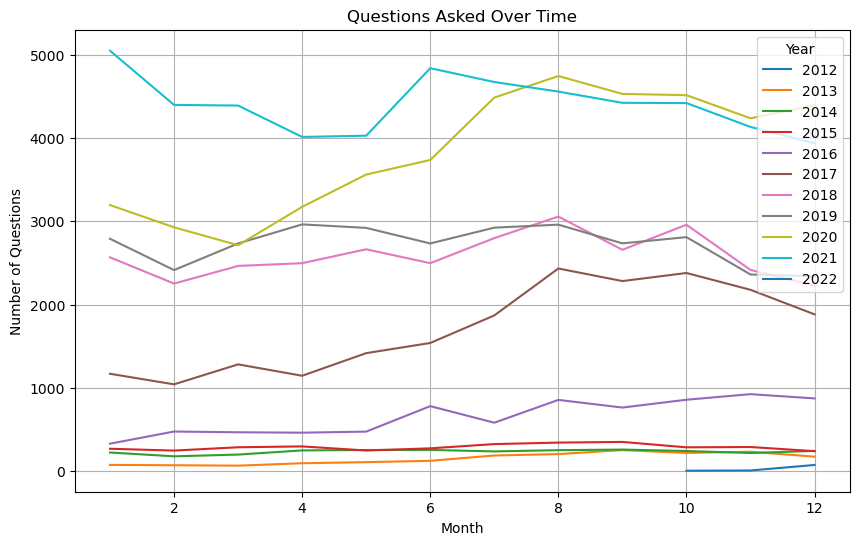

In [30]:
grouped = questions_asked_MoY.groupby("AskedOnUtcYear")

plt.figure(figsize = (10,6))

for year, group in grouped:
    plt.plot(group["AskedOnUtcMoY"], group["Number"], label=str(year))

plt.title('Questions Asked Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# The plot shows that during the summer months, more questions were asked by clients

### Rolling Yearly Averages

In [31]:
questions_asked_MoY['YM'] = questions_asked_MoY['AskedOnUtcYear'].astype(str) + '-' + questions_asked_MoY['AskedOnUtcMoY'].astype(str)
questions_asked_MoY['YM'] = pd.to_datetime(questions_asked_MoY['YM'], format='%Y-%m')
questions_asked_MoY.set_index('YM', inplace=True)
rolling_average_year = questions_asked_MoY['Number'].rolling(window=12).mean() # one-year window

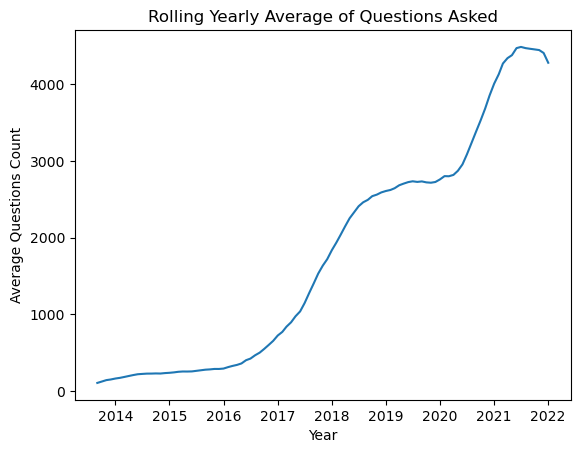

In [32]:
# Plot the rolling yearly averages
plt.plot(rolling_average_year.index, rolling_average_year.values)
plt.xlabel('Year')
plt.ylabel('Average Questions Count')
plt.title('Rolling Yearly Average of Questions Asked')
plt.show()

### Rolling Monthly Averages

In [ ]:
questions['AskedOnUtcDay'] = questions['AskedOnUtc'].dt.day
questions_asked_date = questions.groupby(["AskedOnUtcYear","AskedOnUtcMoY","AskedOnUtcDay"]).size().reset_index()
questions_asked_date = questions_asked_date.rename(columns={0: "Number"})
questions_asked_date.info()

In [34]:
questions_asked_date['Date'] = questions_asked_date['AskedOnUtcYear'].astype(str) + '-' + questions_asked_date['AskedOnUtcMoY'].astype(str) + '-' + questions_asked_date['AskedOnUtcDay'].astype(str)
questions_asked_date['Date'] = pd.to_datetime(questions_asked_date['Date'], format='%Y-%m-%d')
questions_asked_date.set_index('Date', inplace=True)

rolling_average_month = questions_asked_date["Number"].rolling(window=30).mean() # one-month window

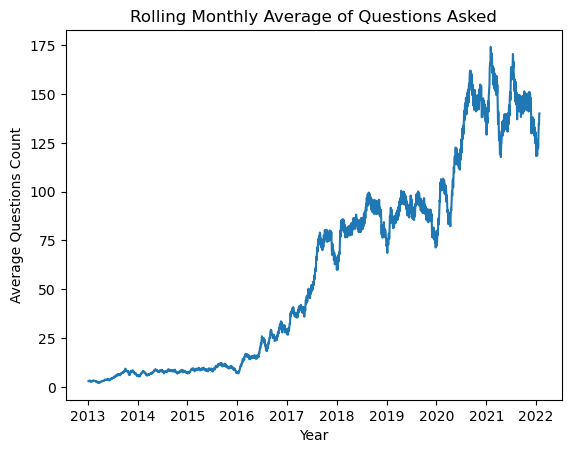

In [35]:
# Plot the rolling monthly averages
plt.plot(rolling_average_month.index, rolling_average_month.values)
plt.xlabel('Year')
plt.ylabel('Average Questions Count')
plt.title('Rolling Monthly Average of Questions Asked')
plt.show()

---

### For the other two parts of the project, please refer to the other two ipynb
1. Data Analysis & Distribution (EDA)
3. NLP Processing & Text Analysis